In [429]:
import plotly.express as px
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import nltk
import ftfy
import string
import re

#Run the below "download" lines of code only once while starting the program
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('vader_lexicon')
#nltk.download('words')

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
px.defaults.height = 500
px.defaults.width = 800

In [430]:
#Read csv file
df = pd.read_csv('user_review.csv')

In [431]:
df.head()

,id,review
0,1,I love this app! It is so useful and easy to use.
1,2,Terrible experience. The app crashes all the t...
2,3,Decent app but needs improvement in the UI.
3,4,Fantastic! This app has changed my life.
4,5,"The app is okay, but it lacks many features."


In [432]:
df.info

<bound method DataFrame.info of     id                                             review
0    1  I love this app! It is so useful and easy to use.
1    2  Terrible experience. The app crashes all the t...
2    3        Decent app but needs improvement in the UI.
3    4           Fantastic! This app has changed my life.
4    5       The app is okay, but it lacks many features.
5    6                Worst app ever. It is full of bugs.
6    7  Excellent functionality and user-friendly design.
7    8  Not bad, but there are better alternatives out...
8    9  I'm very satisfied with this app. Highly recom...
9   10         The app is slow and unresponsive at times.
10  11           Good app, but it could use some updates.
11  12  I had a bad experience. The customer support i...
12  13         Amazing app! Very intuitive and efficient.
13  14              It's an average app. Nothing special.
14  15  I've been using this app for months and I love...
15  16  Disappointed. The app doesn't wo

In [433]:
#read one review, seems there are encoding issues in reviews
df['review'].values[46]

'The app doesnâ€™t have enough tutorials.'

In [434]:
#Data Preprocesssing
# Clean encoding issues
df['review'] = df['review'].apply(ftfy.fix_text)

In [435]:
df.info


<bound method DataFrame.info of     id                                             review
0    1  I love this app! It is so useful and easy to use.
1    2  Terrible experience. The app crashes all the t...
2    3        Decent app but needs improvement in the UI.
3    4           Fantastic! This app has changed my life.
4    5       The app is okay, but it lacks many features.
5    6                Worst app ever. It is full of bugs.
6    7  Excellent functionality and user-friendly design.
7    8  Not bad, but there are better alternatives out...
8    9  I'm very satisfied with this app. Highly recom...
9   10         The app is slow and unresponsive at times.
10  11           Good app, but it could use some updates.
11  12  I had a bad experience. The customer support i...
12  13         Amazing app! Very intuitive and efficient.
13  14              It's an average app. Nothing special.
14  15  I've been using this app for months and I love...
15  16  Disappointed. The app doesn't wo

In [436]:
# Text preprocessing function
#The preprocess_text function helps in standardizing and simplifying the text data by:
# 1 Converting all text to lowercase, ensuring consistency.
# 2 Removing punctuation, reducing noise and simplifying the text.
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    def clean_text(text):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    text = clean_text(text)
    return text

df['cleaned_review'] = df['review'].apply(preprocess_text)

##NLTK

In [437]:
example = df['cleaned_review'][45]
print(example)

helpful customer support


In [438]:
#tokenize the review now
tokens= nltk.word_tokenize(example)
tokens

['helpful', 'customer', 'support']

In [439]:
#Understanding the part of speech is it verb, pronoun, noun etc.
tagged = nltk.pos_tag(tokens)
tagged

[('helpful', 'JJ'), ('customer', 'NN'), ('support', 'NN')]

In [440]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S helpful/JJ customer/NN support/NN)


In [441]:
#Here we will use NLTk SenrtimentIntensityAnalyzer to get neg/neu/pos scores
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [442]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.154, 'pos': 0.846, 'compound': 0.6705}

In [443]:
#Run the polarity score on entire dataset
res ={}
for i, row in tqdm(df.iterrows(), total =len(df)):
    review = row['cleaned_review']
    myid = row['id']
    res[myid] = sia.polarity_scores(review)


  0%|          | 0/50 [00:00<?, ?it/s]

In [444]:
vaders = pd.DataFrame(res).T
vaders
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how = 'left')

In [445]:
#Here we have sentiment score and metadata merged together
vaders.head()

,id,neg,neu,pos,compound,review,cleaned_review
0,1,0.000,0.419,0.581,0.9023,I love this app! It is so useful and easy to use.,i love this app it is so useful and easy to use
1,2,0.307,0.693,0.000,-0.4767,Terrible experience. The app crashes all the t...,terrible experience the app crashes all the time
2,3,0.000,0.636,0.364,0.6124,Decent app but needs improvement in the UI.,decent app but needs improvement in the ui
3,4,0.000,0.625,0.375,0.5574,Fantastic! This app has changed my life.,fantastic this app has changed my life
4,5,0.000,0.847,0.153,0.1154,"The app is okay, but it lacks many features.",the app is okay but it lacks many features


In [446]:
vaders


,id,neg,neu,pos,compound,review,cleaned_review
0,1,0.000,0.419,0.581,0.9023,I love this app! It is so useful and easy to use.,i love this app it is so useful and easy to use
1,2,0.307,0.693,0.000,-0.4767,Terrible experience. The app crashes all the t...,terrible experience the app crashes all the time
2,3,0.000,0.636,0.364,0.6124,Decent app but needs improvement in the UI.,decent app but needs improvement in the ui
3,4,0.000,0.625,0.375,0.5574,Fantastic! This app has changed my life.,fantastic this app has changed my life
4,5,0.000,0.847,0.153,0.1154,"The app is okay, but it lacks many features.",the app is okay but it lacks many features
5,6,0.369,0.631,0.000,-0.6249,Worst app ever. It is full of bugs.,worst app ever it is full of bugs
6,7,0.000,0.519,0.481,0.5719,Excellent functionality and user-friendly design.,excellent functionality and userfriendly design
7,8,0.000,0.548,0.452,0.6980,"Not bad, but there are better alternatives out...",not bad but there are better alternatives out ...
8,9,0.000,0.536,0.464,0.6353,I'm very satisfied with this app. Highly recom...,im very satisfied with this app highly recomme...
9,10,0.000,1.000,0.000,0.0000,The app is slow and unresponsive at times.,the app is slow and unresponsive at times


In [447]:
def get_sentiment(compound):
    
    if compound >= 0.4:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

vaders['sentiment'] = vaders['compound'].apply(get_sentiment)

In [448]:
vaders

,id,neg,neu,pos,compound,review,cleaned_review,sentiment
0,1,0.000,0.419,0.581,0.9023,I love this app! It is so useful and easy to use.,i love this app it is so useful and easy to use,positive
1,2,0.307,0.693,0.000,-0.4767,Terrible experience. The app crashes all the t...,terrible experience the app crashes all the time,negative
2,3,0.000,0.636,0.364,0.6124,Decent app but needs improvement in the UI.,decent app but needs improvement in the ui,positive
3,4,0.000,0.625,0.375,0.5574,Fantastic! This app has changed my life.,fantastic this app has changed my life,positive
4,5,0.000,0.847,0.153,0.1154,"The app is okay, but it lacks many features.",the app is okay but it lacks many features,neutral
5,6,0.369,0.631,0.000,-0.6249,Worst app ever. It is full of bugs.,worst app ever it is full of bugs,negative
6,7,0.000,0.519,0.481,0.5719,Excellent functionality and user-friendly design.,excellent functionality and userfriendly design,positive
7,8,0.000,0.548,0.452,0.6980,"Not bad, but there are better alternatives out...",not bad but there are better alternatives out ...,positive
8,9,0.000,0.536,0.464,0.6353,I'm very satisfied with this app. Highly recom...,im very satisfied with this app highly recomme...,positive
9,10,0.000,1.000,0.000,0.0000,The app is slow and unresponsive at times.,the app is slow and unresponsive at times,neutral


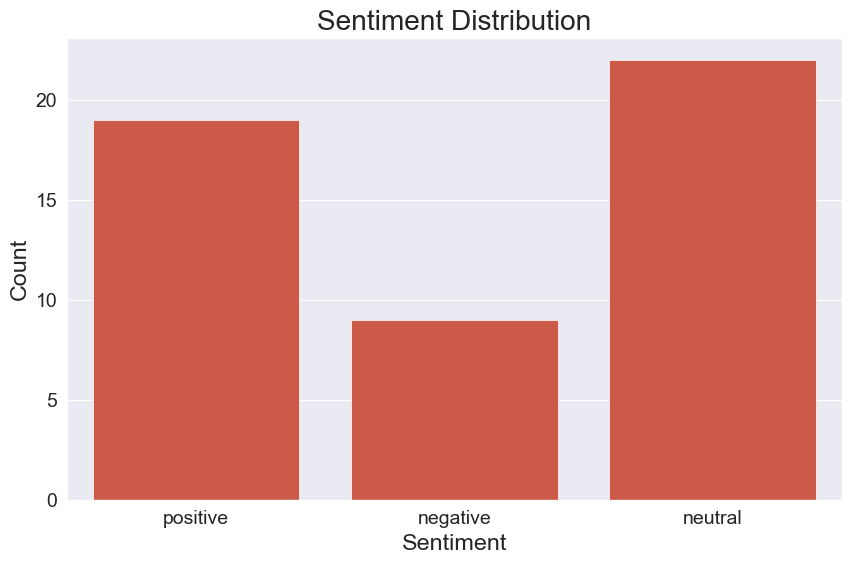

In [449]:
sns.countplot(x='sentiment', data=vaders)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Roberta Pretrained Model

In [450]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [451]:
#MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
#tokenizer = AutoTokenizer.from_pretrained(MODEL)
#model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [452]:
#Applying the above model on an example set
print(example)
sia.polarity_scores(example)

helpful customer support


{'neg': 0.0, 'neu': 0.154, 'pos': 0.846, 'compound': 0.6705}

In [453]:
#Run it for Roberta
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example,return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return(scores_dict)
    

In [454]:
res ={}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        review = row['cleaned_review']
        myid = row['id']
        vader_result = sia.polarity_scores(review)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f'vader_{key}'] = value
        roberta_result = polarity_scores_roberta(review)
        both = {**vader_result_rename,**roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id{myid}')
    

  0%|          | 0/50 [00:00<?, ?it/s]

In [455]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how = 'left')

In [456]:
results_df

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,review,cleaned_review
0,1,0.000,0.419,0.581,0.9023,0.002317,0.005621,0.992062,I love this app! It is so useful and easy to use.,i love this app it is so useful and easy to use
1,2,0.307,0.693,0.000,-0.4767,0.978697,0.018580,0.002723,Terrible experience. The app crashes all the t...,terrible experience the app crashes all the time
2,3,0.000,0.636,0.364,0.6124,0.078857,0.380859,0.540284,Decent app but needs improvement in the UI.,decent app but needs improvement in the ui
3,4,0.000,0.625,0.375,0.5574,0.004705,0.028747,0.966547,Fantastic! This app has changed my life.,fantastic this app has changed my life
4,5,0.000,0.847,0.153,0.1154,0.705159,0.254419,0.040422,"The app is okay, but it lacks many features.",the app is okay but it lacks many features
5,6,0.369,0.631,0.000,-0.6249,0.982465,0.015060,0.002475,Worst app ever. It is full of bugs.,worst app ever it is full of bugs
6,7,0.000,0.519,0.481,0.5719,0.003319,0.046895,0.949785,Excellent functionality and user-friendly design.,excellent functionality and userfriendly design
7,8,0.000,0.548,0.452,0.6980,0.176046,0.504767,0.319187,"Not bad, but there are better alternatives out...",not bad but there are better alternatives out ...
8,9,0.000,0.536,0.464,0.6353,0.001571,0.009612,0.988817,I'm very satisfied with this app. Highly recom...,im very satisfied with this app highly recomme...
9,10,0.000,1.000,0.000,0.0000,0.962912,0.034196,0.002893,The app is slow and unresponsive at times.,the app is slow and unresponsive at times


In [457]:
def get_sentiment(compound):
    
    if compound >= 0.4:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

results_df['vader_sentiment'] = results_df['vader_compound'].apply(get_sentiment)
results_df

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,review,cleaned_review,vader_sentiment
0,1,0.000,0.419,0.581,0.9023,0.002317,0.005621,0.992062,I love this app! It is so useful and easy to use.,i love this app it is so useful and easy to use,positive
1,2,0.307,0.693,0.000,-0.4767,0.978697,0.018580,0.002723,Terrible experience. The app crashes all the t...,terrible experience the app crashes all the time,negative
2,3,0.000,0.636,0.364,0.6124,0.078857,0.380859,0.540284,Decent app but needs improvement in the UI.,decent app but needs improvement in the ui,positive
3,4,0.000,0.625,0.375,0.5574,0.004705,0.028747,0.966547,Fantastic! This app has changed my life.,fantastic this app has changed my life,positive
4,5,0.000,0.847,0.153,0.1154,0.705159,0.254419,0.040422,"The app is okay, but it lacks many features.",the app is okay but it lacks many features,neutral
5,6,0.369,0.631,0.000,-0.6249,0.982465,0.015060,0.002475,Worst app ever. It is full of bugs.,worst app ever it is full of bugs,negative
6,7,0.000,0.519,0.481,0.5719,0.003319,0.046895,0.949785,Excellent functionality and user-friendly design.,excellent functionality and userfriendly design,positive
7,8,0.000,0.548,0.452,0.6980,0.176046,0.504767,0.319187,"Not bad, but there are better alternatives out...",not bad but there are better alternatives out ...,positive
8,9,0.000,0.536,0.464,0.6353,0.001571,0.009612,0.988817,I'm very satisfied with this app. Highly recom...,im very satisfied with this app highly recomme...,positive
9,10,0.000,1.000,0.000,0.0000,0.962912,0.034196,0.002893,The app is slow and unresponsive at times.,the app is slow and unresponsive at times,neutral


In [458]:
sentiment_res = []

for i, row in tqdm(results_df.iterrows(), total = len(results_df)):
    nue = row['roberta_neu']
    pos = row['roberta_pos']
    neg = row['roberta_neg']
    na_diff_neg = nue-neg
    na_diff_pos = nue-pos
    diff_neg = abs(nue-neg)
    diff_pos = abs(nue-pos)
    #print(f'diff_neg:{diff_neg} diff_pos:{diff_pos}')
    if (diff_neg <= 0.3 and (diff_pos <= 0.5 and diff_pos > 0.1 )) or (diff_pos <= 0.3 and (diff_neg <= 0.5 and diff_neg > 0.1)):
        sentiment_res.append('neutral')
    elif diff_neg < 0.1 and diff_pos < 0.1:
        sentiment_res.append('neutral')
    elif na_diff_neg >0.5 or na_diff_pos > 0.5:
        sentiment_res.append('neutral')
    elif pos > neg:
        sentiment_res.append('positive')
    elif neg > pos:
        sentiment_res.append('negative')
    else:
        sentiment_res.append('NA')


        



  0%|          | 0/50 [00:00<?, ?it/s]

In [459]:
sentiment_df = pd.DataFrame({'roberta_sentiment': sentiment_res})

# Create a new DataFrame with the list as a row
#new_row_df = pd.DataFrame([my_list], columns=df.columns)

# Concatenate the original DataFrame with the new row DataFrame along the row axis (axis=0)
results_df = pd.concat([results_df, sentiment_df], axis=1, ignore_index=False)

In [460]:
results_df

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,review,cleaned_review,vader_sentiment,roberta_sentiment
0,1,0.000,0.419,0.581,0.9023,0.002317,0.005621,0.992062,I love this app! It is so useful and easy to use.,i love this app it is so useful and easy to use,positive,positive
1,2,0.307,0.693,0.000,-0.4767,0.978697,0.018580,0.002723,Terrible experience. The app crashes all the t...,terrible experience the app crashes all the time,negative,negative
2,3,0.000,0.636,0.364,0.6124,0.078857,0.380859,0.540284,Decent app but needs improvement in the UI.,decent app but needs improvement in the ui,positive,neutral
3,4,0.000,0.625,0.375,0.5574,0.004705,0.028747,0.966547,Fantastic! This app has changed my life.,fantastic this app has changed my life,positive,positive
4,5,0.000,0.847,0.153,0.1154,0.705159,0.254419,0.040422,"The app is okay, but it lacks many features.",the app is okay but it lacks many features,neutral,neutral
5,6,0.369,0.631,0.000,-0.6249,0.982465,0.015060,0.002475,Worst app ever. It is full of bugs.,worst app ever it is full of bugs,negative,negative
6,7,0.000,0.519,0.481,0.5719,0.003319,0.046895,0.949785,Excellent functionality and user-friendly design.,excellent functionality and userfriendly design,positive,positive
7,8,0.000,0.548,0.452,0.6980,0.176046,0.504767,0.319187,"Not bad, but there are better alternatives out...",not bad but there are better alternatives out ...,positive,neutral
8,9,0.000,0.536,0.464,0.6353,0.001571,0.009612,0.988817,I'm very satisfied with this app. Highly recom...,im very satisfied with this app highly recomme...,positive,positive
9,10,0.000,1.000,0.000,0.0000,0.962912,0.034196,0.002893,The app is slow and unresponsive at times.,the app is slow and unresponsive at times,neutral,negative


In [462]:
fig = px.histogram(results_df,
                   x = 'roberta_sentiment',
                   marginal = 'box',
                   title = 'Sentiments(ROBERTA)')
fig.update_layout(bargap=0.1)
fig.show()

In [463]:
fig = px.histogram(results_df,
                   x = 'vader_sentiment',
                   marginal = 'box',
                   title = 'Sentiments(VADER)')
fig.update_layout(bargap=0.1)
fig.show()